In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import names
import os
import random

## Naive Bayes - on Iris dataset from sns - 3 flower species

In [3]:
df = sns.load_dataset("iris")

In [4]:
df.shape

(150, 5)

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
df['species'].unique() #more than 3 - multinomial classification

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: xlabel='species', ylabel='count'>

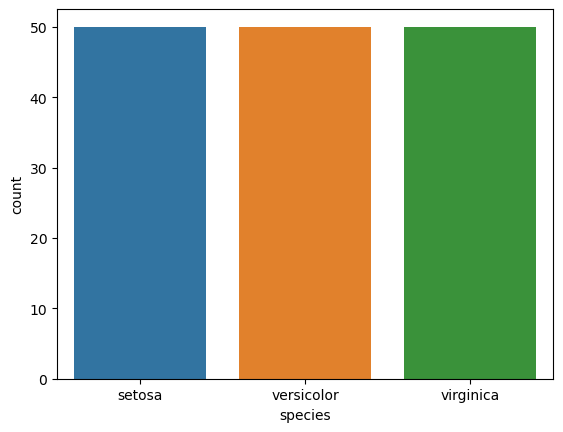

In [8]:
sns.countplot(x='species', data=df)

In [44]:
df['species'].value_counts() #equally distributed

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Split into Independent & Target Var

In [10]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## Label Encoding Target Var - species

In [14]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [16]:
print(y_encoded, end=" ")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

In [45]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Model Buliding

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, shuffle=True)

In [46]:
classifier = MultinomialNB()  #model built
classifier.fit(x_train, y_train)

MultinomialNB()

## Make Predictions

In [31]:
y_pred_probs = classifier.predict_proba(x_test)

In [32]:
encoder.classes_ #all classes available

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
fpr = dict()
tpr = dict()
auc_score = dict()

for i in range(len(encoder.classes_)): #loop for each species
    y_test_i = (y_test == i) . astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_i, y_pred_probs[:,i])
    auc_score[i] = auc(fpr[i], tpr[i])

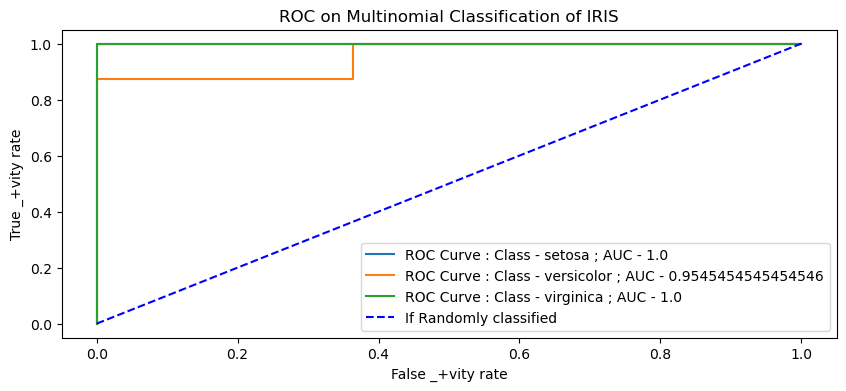

In [47]:
plt.figure(figsize=(10,4))
plt.title("ROC on Multinomial Classification of IRIS")

for i in range (len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve : Class - {encoder.classes_[i]} ; AUC - {auc_score[i]}")

plt.plot([0,1], [0,1], "b--", label="If Randomly classified")
plt.xlabel("False _+vity rate")
plt.ylabel("True _+vity rate")
plt.legend(); #no errors

In [41]:
y_pred = classifier.predict(x_test)
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.50      1.00      0.67         8
           2       1.00      0.38      0.56        13

    accuracy                           0.73        30
   macro avg       0.83      0.79      0.74        30
weighted avg       0.87      0.73      0.72        30



<Axes: >

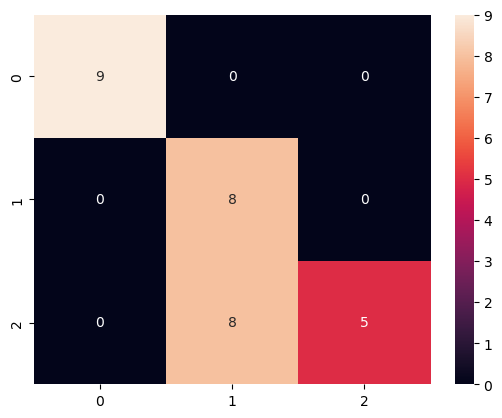

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)